Trabalho sobre Regressão Linear Simples e Regressão Múltipla  
Ciência da Computação, FEI - Cálculo Numérico CA4322  
Integrantes:  
Guilherme Vieira Silva Gonçalves 22.121.025-5  
Kenzo Sugai 22.121.005-7  
Amanda Pollo Sarlo 22.121.047-9  

In [1]:
# imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sympy as sy
from sklearn.metrics import r2_score
import statistics
import statsmodels.api as sm 

In [2]:
# lendo o dataset escolhido (concrete_data)
data = pd.read_csv("datasets/concrete_data.csv")
data.head(25)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


intercept:  140.80137234743793
slope:  [-0.12298557]
R2: 0.02436555619463865
Correlação:  [[ 1.        -0.1560947]
 [-0.1560947  1.       ]]


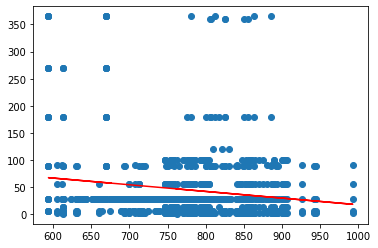

In [3]:
# primeira regressão linear
data = data.to_numpy()
y = data[:,7] # age
x = data[:,6] # fine_aggregate
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print("intercept: ",modelo.intercept_)
print("slope: ",modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
# R2
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)
# Correlação
correlacao = np.corrcoef(x, y)
print("Correlação: ", correlacao)

# O Coeficiente de correlação foi de -0.1560947, sendo -0.3 <= r < 0 -> correlação linear fraca negativa
# A equação da reta de regressão é y = 140.80137234743793*x - 0.12298557
# O valor do R^2 foi de 0.02436555619463865 monstrando que 2% da variência dos dados é explicada pela variância dos dados

intercept:  994.4005526932119
slope:  [-3.4621752]
R2: 0.07075554683583007
Correlação:  [[ 1.         -0.26599915]
 [-0.26599915  1.        ]]


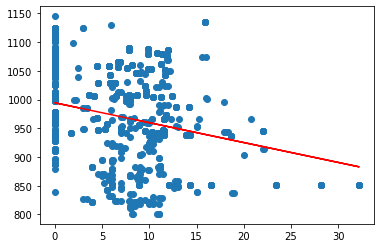

In [4]:
# segunda regressão linear
y = data[:,5] # coarse_aggregate
x = data[:,4] # superplasticizer
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print("intercept: ",modelo.intercept_)
print("slope: ",modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
# R2
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)
# Correlação
correlacao = np.corrcoef(x, y)
print("Correlação: ", correlacao)

# O Coeficiente de correlação foi de -0.26599915, sendo -0.3 <= r < 0 -> correlação linear fraca negativa
# A equação da reta de regressão é y = 994.4005526932119*x - 3.4621752
# O valor do R^2 foi de 0.07075554683583007 monstrando que 7% da variência dos dados é explicada pela variância dos dados

intercept:  -4.784517043918385
slope:  [0.43333987]
R2: 0.011502997340888999
Correlação:  [[1.         0.10725203]
 [0.10725203 1.        ]]


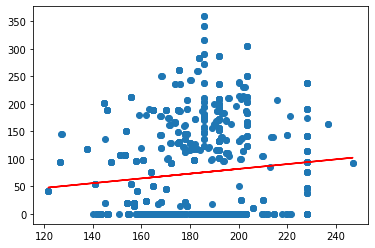

In [5]:
# terceira regressão linear
y = data[:,1] # blast_furnace_slag
x = data[:,3] # water
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print("intercept: ",modelo.intercept_)
print("slope: ",modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
# R2
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)
# Correlação
correlacao = np.corrcoef(x, y)
print("Correlação: ", correlacao)
# O Coeficiente de correlação foi de 0.10725203, sendo 0 <= r < 0,3 -> correlação linear fraca positiva
# A equação da reta de regressão é y = -4.784517043918385*x + 0.43333987
# O valor do R^2 foi de 0.011502997340888999 monstrando que 1% da variência dos dados é explicada pela variância dos dados

intercept:  4.719806698943169
slope:  [0.00528102]
R2: 0.008535204916091055
Correlação:  [[1.         0.09238617]
 [0.09238617 1.        ]]


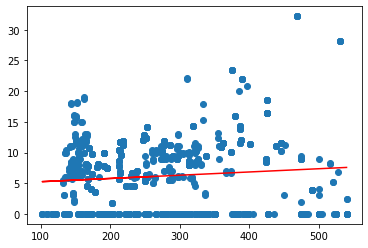

In [6]:
# quarta regressão linear
y = data[:,4] # superplasticizer
x = data[:,0] # cement
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print("intercept: ",modelo.intercept_)
print("slope: ",modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
# R2
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)
# Correlação
correlacao = np.corrcoef(x, y)
print("Correlação: ", correlacao)

# O Coeficiente de correlação foi de 0.09238617, sendo 0 <= r < 0,3 -> correlação linear fraca positiva
# A equação da reta de regressão é y = 4.719806698943169*x + 0.00528102
# O valor do R^2 foi de 0.008535204916091055 monstrando que 0,8% da variência dos dados é explicada pela variância dos dados

intercept:  274.42009236514434
slope:  [-0.12002993]
R2: 0.20309549386824388
Correlação:  [[ 1.         -0.45066117]
 [-0.45066117  1.        ]]


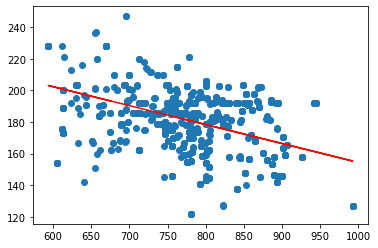

In [7]:
# quinta regressão linear
y = data[:,3] # water
x = data[:,6] # fine_aggregate
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print("intercept: ",modelo.intercept_)
print("slope: ",modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
# R2
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)
# Correlação
correlacao = np.corrcoef(x, y)
print("Correlação: ", correlacao)

# O Coeficiente de correlação foi de -0.45066117, sendo -0.7 <= r < -0.3 -> correlação linear moderada negativa
# A equação da reta de regressão é y = 274.42009236514434*x - 0.12002993
# O valor do R^2 foi de 0.20309549386824388 monstrando que 20% da variência dos dados é explicada pela variância dos dados

In [8]:
# regressão linear multipla com OLS Summary
data = pd.read_csv('datasets/concrete_data.csv')
X = data[['cement','water','concrete_compressive_strength']]
y = data[['coarse_aggregate']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

# A variável menos significativa é a "cement", a mais significativa é eu sei lá porra ta tudo 0 nesse caraio 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       coarse_aggregate   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     31.83
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.12e-19
Time:                        12:36:06   Log-Likelihood:                -5899.3
No. Observations:                1030   AIC:                         1.181e+04
Df Residuals:                    1026   BIC:                         1.183e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1179.7638     22.960     51.382      0.000    1134.709    1224.819
cement                           -0.0115      0.026     -0.446      0.656      -0.062       0.039
water                            -0.9106      0.114     -7.993      0.000      -1.134      -0.687
concrete_compressive_strength    -1.0691      0.167     -6.389      0.000      -1.397      -0.741
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.435
Skew:                          -0.030   Prob(JB):                        0.488
Kurtosis:                       2.827   Cond. No.                     3.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

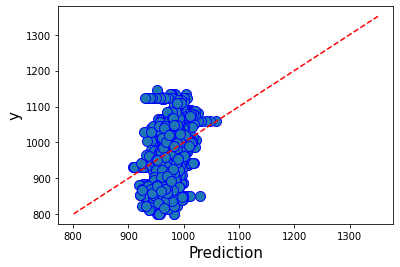

R2: 0.08515703892663695


In [9]:
# regressão linear multipla com scikit learn
data = pd.read_csv('datasets/concrete_data.csv')
y = data[['coarse_aggregate']]
x = data[['cement','water','concrete_compressive_strength']]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(x,y)
y_pred = modelo.predict(x)

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

R2 = r2_score(y, y_pred)
print('R2:', R2)

# 0,7 <= r < 1  ->  correlação linear fortemente positiva 
